In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('nba_team_stats_historical.csv')

# Filter data for the 2025 season
df_2025 = df[df['Season'] == 2025].copy()


In [2]:
# Function to normalize a series
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Compute Offensive Efficiency Score
df_2025['OFF_EFF_SCORE'] = (
    normalize(df_2025['PTS']) * 0.3 +
    normalize(df_2025['FG%']) * 0.3 +
    normalize(df_2025['3P%']) * 0.2 +
    normalize(df_2025['FT%']) * 0.2
)


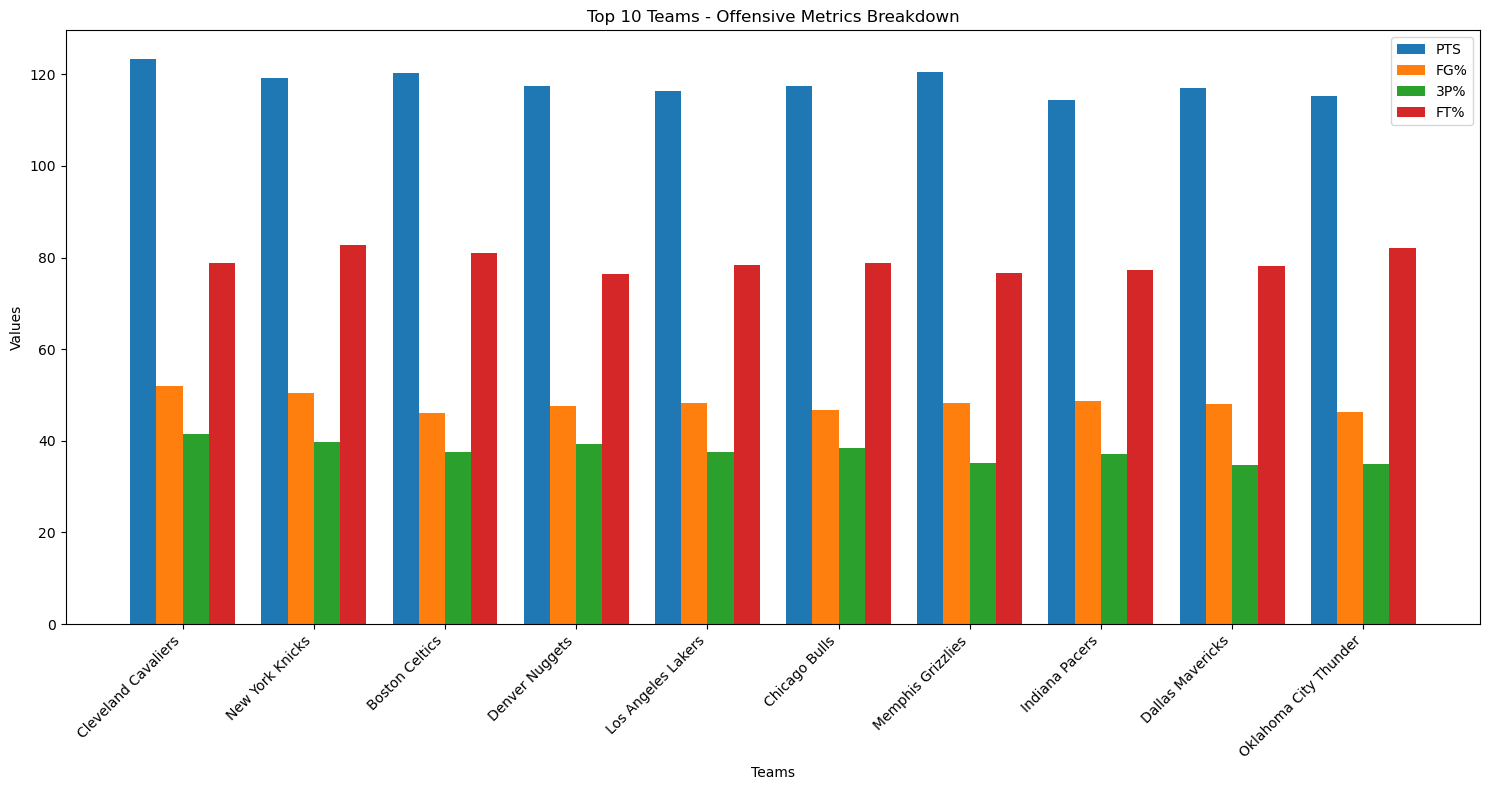

In [3]:
# Plot Top 10 Teams - Offensive Metrics Breakdown
plt.figure(figsize=(15, 8))
teams = df_2025.sort_values('OFF_EFF_SCORE', ascending=False).head(10)
metrics = ['PTS', 'FG%', '3P%', 'FT%']
x = np.arange(len(teams))
width = 0.2

# Create bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, teams[metric], width, label=metric)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Values')
plt.title('Top 10 Teams - Offensive Metrics Breakdown')
plt.xticks(x + width * 1.5, teams['Team'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


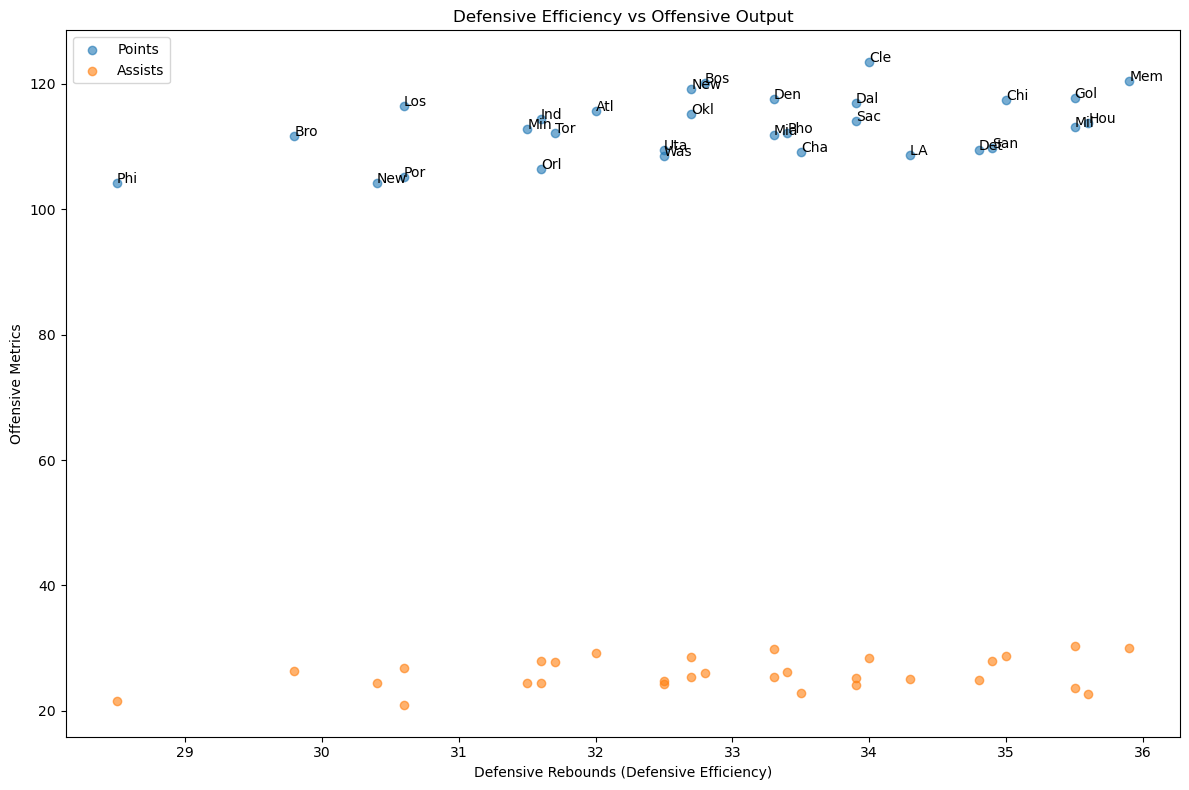

In [4]:
# Plot Defensive Efficiency vs Offensive Output
plt.figure(figsize=(12, 8))
plt.scatter(df_2025['DREB'], df_2025['PTS'], alpha=0.6, label='Points')
plt.scatter(df_2025['DREB'], df_2025['AST'], alpha=0.6, label='Assists')

# Add labels and title
plt.xlabel('Defensive Rebounds (Defensive Efficiency)')
plt.ylabel('Offensive Metrics')
plt.title('Defensive Efficiency vs Offensive Output')

# Annotate team names
for i, txt in enumerate(df_2025['Team']):
    plt.annotate(txt[:3], (df_2025['DREB'].iloc[i], df_2025['PTS'].iloc[i]))

plt.legend()
plt.tight_layout()
plt.show()


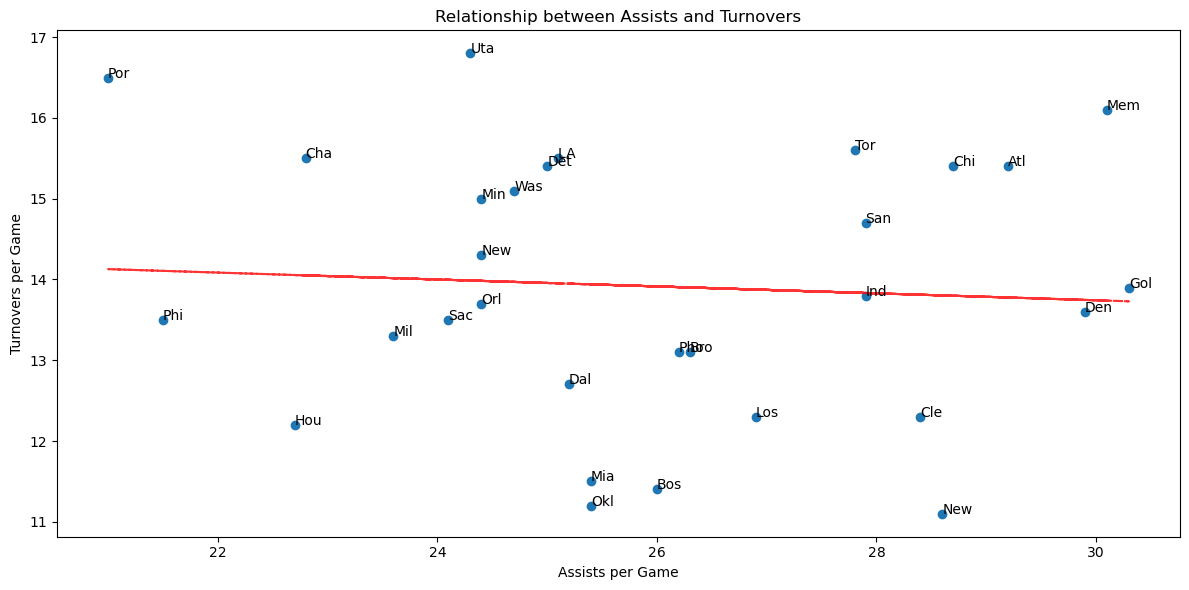

In [5]:
# Plot Assists vs Turnovers
plt.figure(figsize=(12, 6))
plt.scatter(df_2025['AST'], df_2025['TO'])

# Add regression line
z = np.polyfit(df_2025['AST'], df_2025['TO'], 1)
p = np.poly1d(z)
plt.plot(df_2025['AST'], p(df_2025['AST']), "r--", alpha=0.8)

# Add labels and title
plt.xlabel('Assists per Game')
plt.ylabel('Turnovers per Game')
plt.title('Relationship between Assists and Turnovers')

# Annotate team names
for i, txt in enumerate(df_2025['Team']):
    plt.annotate(txt[:3], (df_2025['AST'].iloc[i], df_2025['TO'].iloc[i]))

plt.tight_layout()
plt.show()


In [6]:
# Question 1: Top 5 Teams by Offensive Efficiency
print("\nQuestion 1: Top 5 Teams by Offensive Efficiency")
print(df_2025[['Team', 'OFF_EFF_SCORE', 'PTS', 'FG%', '3P%', 'FT%']]
      .sort_values('OFF_EFF_SCORE', ascending=False)
      .head()
      .round(3))

# Question 2: Correlation between Defense and Offense
print("\nQuestion 2: Correlation between Defense and Offense")
defensive_offensive_corr = df_2025['DREB'].corr(df_2025['PTS'])
print(f"Correlation between Defensive Rebounds and Points: {defensive_offensive_corr:.3f}")

# Question 3: Assist-Turnover Relationship
print("\nQuestion 3: Assist-Turnover Relationship")
assist_turnover_corr = df_2025['AST'].corr(df_2025['TO'])
print(f"Correlation between Assists and Turnovers: {assist_turnover_corr:.3f}")



Question 1: Top 5 Teams by Offensive Efficiency
                  Team  OFF_EFF_SCORE    PTS   FG%   3P%   FT%
0  Cleveland Cavaliers          0.942  123.4  52.0  41.5  78.9
3      New York Knicks          0.854  119.1  50.4  39.8  82.7
2       Boston Celtics          0.674  120.2  46.1  37.5  80.9
5       Denver Nuggets          0.641  117.5  47.6  39.2  76.5
8   Los Angeles Lakers          0.638  116.4  48.2  37.5  78.3

Question 2: Correlation between Defense and Offense
Correlation between Defensive Rebounds and Points: 0.461

Question 3: Assist-Turnover Relationship
Correlation between Assists and Turnovers: -0.066


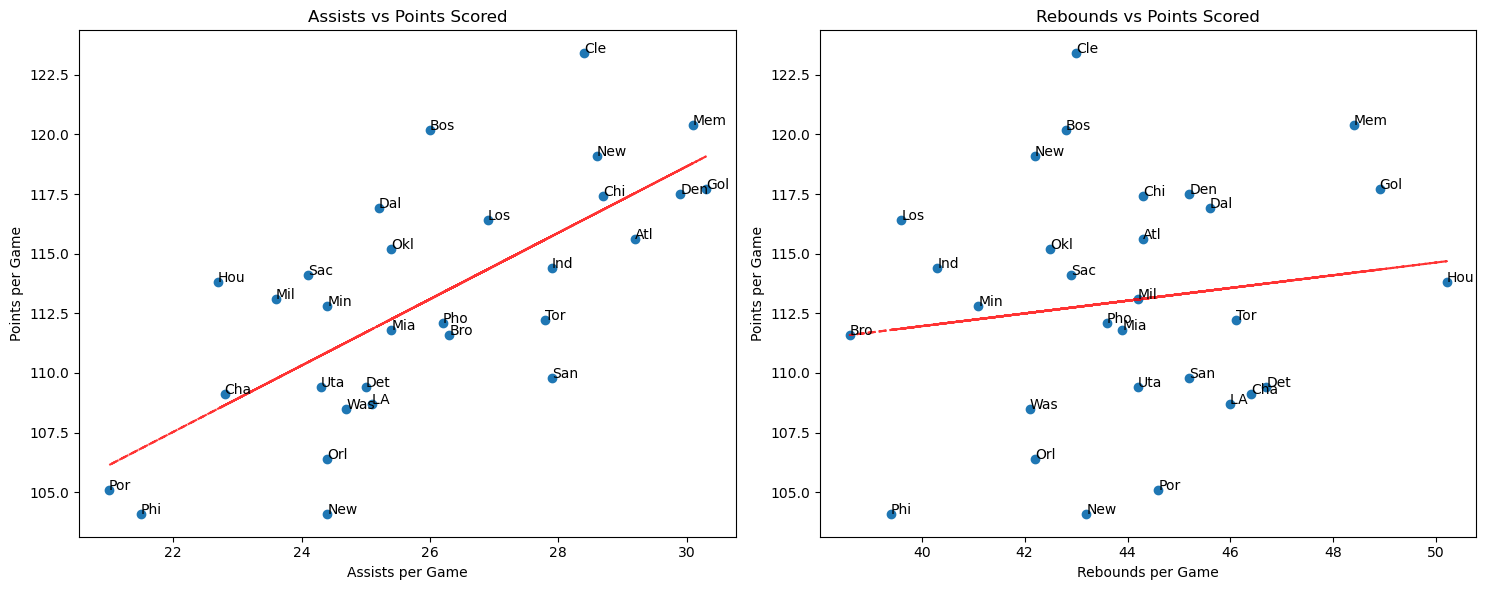


Correlation Analysis:
Assists to Points correlation: 0.704
Rebounds to Points correlation: 0.147

Top 5 Teams by Assists:
                 Team  AST   PTS
Golden State Warriors 30.3 117.7
    Memphis Grizzlies 30.1 120.4
       Denver Nuggets 29.9 117.5
        Atlanta Hawks 29.2 115.6
        Chicago Bulls 28.7 117.4

Top 5 Teams by Rebounds:
                 Team  REB   PTS
      Houston Rockets 50.2 113.8
Golden State Warriors 48.9 117.7
    Memphis Grizzlies 48.4 120.4
      Detroit Pistons 46.7 109.4
    Charlotte Hornets 46.4 109.1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv('nba_team_stats_historical.csv')
df_2025 = df[df['Season'] == 2025].copy()

# Create subplots for assists and rebounds analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Assists vs Points
ax1.scatter(df_2025['AST'], df_2025['PTS'])
z1 = np.polyfit(df_2025['AST'], df_2025['PTS'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_2025['AST'], p1(df_2025['AST']), "r--", alpha=0.8)
ax1.set_xlabel('Assists per Game')
ax1.set_ylabel('Points per Game')
ax1.set_title('Assists vs Points Scored')

# Add team labels
for i, txt in enumerate(df_2025['Team']):
    ax1.annotate(txt[:3], (df_2025['AST'].iloc[i], df_2025['PTS'].iloc[i]))

# Rebounds vs Points
ax2.scatter(df_2025['REB'], df_2025['PTS'])
z2 = np.polyfit(df_2025['REB'], df_2025['PTS'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_2025['REB'], p2(df_2025['REB']), "r--", alpha=0.8)
ax2.set_xlabel('Rebounds per Game')
ax2.set_ylabel('Points per Game')
ax2.set_title('Rebounds vs Points Scored')

# Add team labels
for i, txt in enumerate(df_2025['Team']):
    ax2.annotate(txt[:3], (df_2025['REB'].iloc[i], df_2025['PTS'].iloc[i]))

plt.tight_layout()
plt.show()

# Print correlation statistics
ast_pts_corr = df_2025['AST'].corr(df_2025['PTS']).round(3)
reb_pts_corr = df_2025['REB'].corr(df_2025['PTS']).round(3)

print("\nCorrelation Analysis:")
print(f"Assists to Points correlation: {ast_pts_corr}")
print(f"Rebounds to Points correlation: {reb_pts_corr}")

# Print top 5 teams in each category
print("\nTop 5 Teams by Assists:")
print(df_2025[['Team', 'AST', 'PTS']].sort_values('AST', ascending=False).head().to_string(index=False))

print("\nTop 5 Teams by Rebounds:")
print(df_2025[['Team', 'REB', 'PTS']].sort_values('REB', ascending=False).head().to_string(index=False))